In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder 
import category_encoders as ce   
from scipy import stats

In [2]:
!pip install  category_encoders

In [3]:
data =pd.read_csv("Credit_card.csv")

In [4]:
data.head() 

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [5]:
data.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [6]:
data.shape

(1548, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [9]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [10]:
new_data=data.dropna(axis =0)

In [11]:
new_data.shape

(1025, 18)

In [12]:
new_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2


In [13]:
new_data.select_dtypes('object')

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
8,M,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Core staff
9,M,Y,Y,Pensioner,Secondary / secondary special,Married,House / apartment,Core staff
10,M,Y,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Core staff
11,F,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Cooking staff
13,F,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Cooking staff
...,...,...,...,...,...,...,...,...
1540,F,Y,Y,Working,Higher education,Married,House / apartment,Accountants
1542,M,Y,N,State servant,Secondary / secondary special,Married,House / apartment,Drivers
1544,F,N,N,Commercial associate,Incomplete higher,Single / not married,House / apartment,Accountants
1545,M,Y,Y,Working,Higher education,Married,House / apartment,Managers


In [14]:
new_data.select_dtypes('int')

,Ind_ID,CHILDREN,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
8,5010864,1,-678,1,0,1,1,3
9,5010868,1,-678,1,0,1,1,3
10,5010869,1,-678,1,0,1,1,1
11,5018498,0,-1002,1,1,1,0,2
13,5018503,0,-1002,1,1,1,0,2
...,...,...,...,...,...,...,...,...
1540,5024049,1,-2924,1,0,0,0,3
1542,5118268,1,-3536,1,0,1,0,3
1544,5023655,0,-1209,1,0,0,0,1
1545,5115992,2,-2477,1,0,0,0,4


<Axes: xlabel='Annual_income', ylabel='Density'>

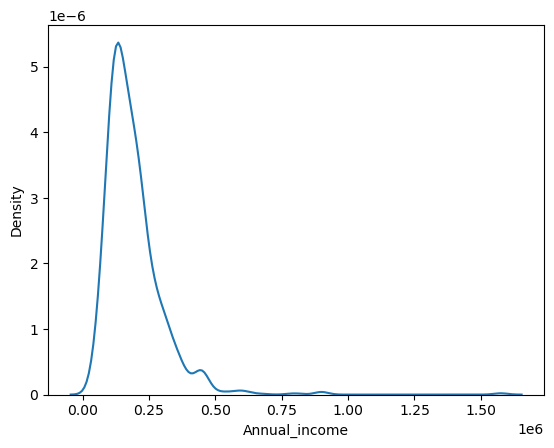

In [15]:
sns.kdeplot(data[ 'Annual_income'])

In [16]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

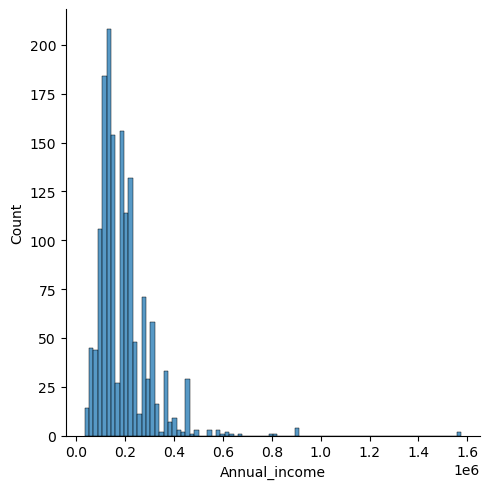

In [17]:
sns.displot(data[ 'Annual_income'])

<Axes: ylabel='Annual_income'>

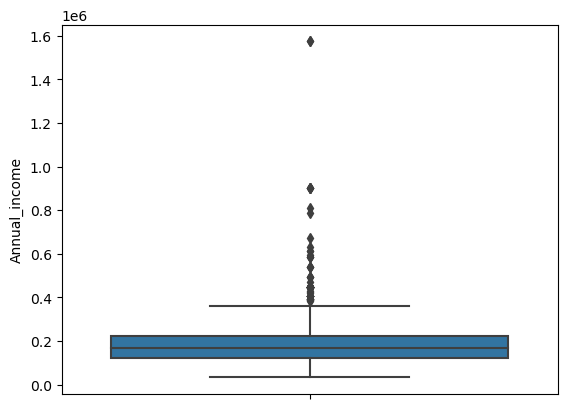

In [18]:
sns.boxplot(y = data['Annual_income'])

In [19]:
z = stats.zscore(data['Annual_income'])

In [20]:
z

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1543   NaN
1544   NaN
1545   NaN
1546   NaN
1547   NaN
Name: Annual_income, Length: 1548, dtype: float64

In [21]:
new_data = new_data.iloc[np.where(z <= 3)]

In [22]:
print(np.where(z < -3))

(array([], dtype=int64),)


In [23]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [24]:
Q1 = new_data['Annual_income'].quantile(0.25)
Q3 = new_data['Annual_income'].quantile(0.75)

In [25]:
Q1

nan

In [26]:
Q3

nan

In [27]:
IQR = Q3 - Q1

In [28]:
IQR

nan

In [29]:
low_lim = Q1 - 1.5 * IQR
high_lim = Q3 + 1.5 * IQR

In [30]:
new_data = new_data[(data['Annual_income'] > low_lim) & (new_data['Annual_income'] < high_lim)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_20612\4055983226.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = new_data[(data['Annual_income'] > low_lim) & (new_data['Annual_income'] < high_lim)]


In [31]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


<Axes: xlabel='Annual_income', ylabel='Density'>

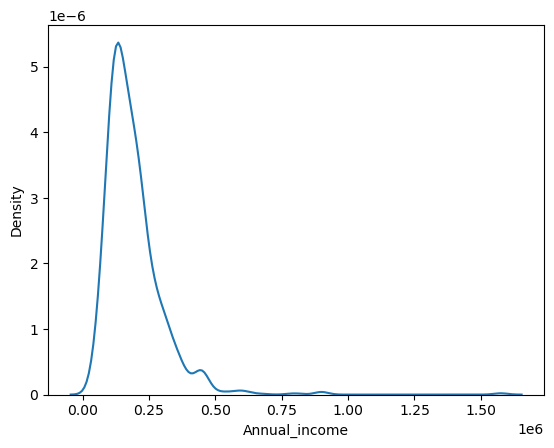

In [32]:
sns.kdeplot(data['Annual_income'])

# 1. log transformation


In [33]:
sns.set()

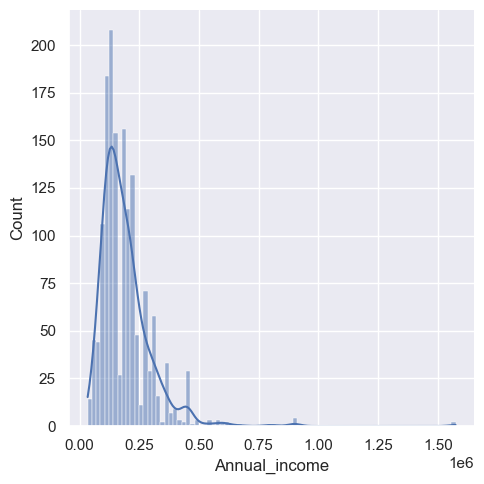

In [34]:
sns.displot(data['Annual_income'], kde = True)

In [35]:
data['Annual_income_log'] = np.log(data['Annual_income'])

In [36]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Annual_income_log
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,12.100712
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,12.660328
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,12.660328
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,NaN
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,12.660328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,NaN
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,12.323856
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,12.100712
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,12.506177


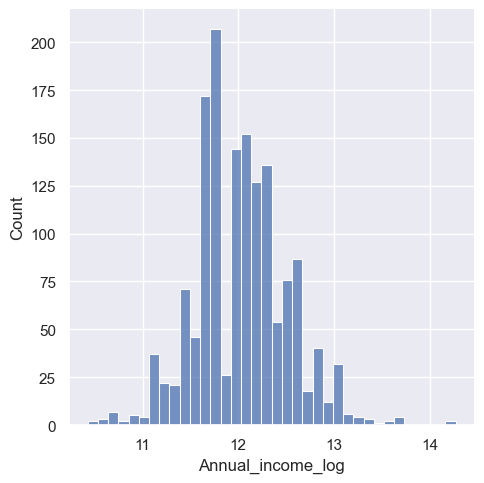

In [37]:
sns.displot(data['Annual_income_log'])

In [38]:
data['Annual_income_sqrt'] = np.sqrt(data['Annual_income'])

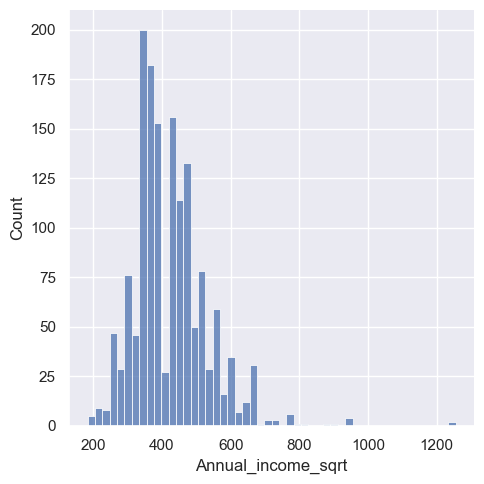

In [39]:
sns.displot(data['Annual_income_sqrt'])

In [40]:
stats.boxcox(data['Annual_income'])

(array([3.93903175e+43, 4.51274546e+45, 4.51274546e+45, ...,
        3.93903175e+43, 1.22252724e+45, 2.60870081e+44]),
 8.472135811722177)

In [41]:
data['Annual_income_transformed'] = stats.boxcox(data['Annual_income'])[0]

In [42]:
sns.set()

In [47]:
data.head(20)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Annual_income_log,Annual_income_sqrt,Annual_income_transformed
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2,12.100712,424.264069,3.939032e+43
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,12.660328,561.248608,4.512745e+45
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,12.660328,561.248608,4.512745e+45
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,NaN,NaN,NaN
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,12.660328,561.248608,4.512745e+45
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,12.660328,561.248608,4.512745e+45
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,12.660328,561.248608,4.512745e+45
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2,12.100712,424.264069,3.939032e+43
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-678,1,0,1,1,Core staff,3,13.017003,670.820393,9.263845e+46
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,-678,1,0,1,1,Core staff,3,13.017003,670.820393,9.263845e+46


In [73]:
var_list = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Marital_status', 'Housing_type']

def binary_map(x):
    return x.map({'M':0, 'F':1,'Y':0, 'N':1, 'Married':0, 'Single / not married':1,'House / apartment': 0, 'With parents':1 })
data[var_list] = data [var_list].apply(binary_map)

In [74]:
data.head(15)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Birthday_count,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,5008827,NaN,NaN,NaN,0,180000.0,NaN,NaN,NaN,-18772.0,...,0,0,0,0,0,0,0,0,0,0
1,5009744,NaN,NaN,NaN,0,315000.0,NaN,NaN,NaN,-13557.0,...,0,0,0,0,0,0,0,0,0,0
2,5009746,NaN,NaN,NaN,0,315000.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,5009749,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,-13557.0,...,0,0,0,0,0,0,0,0,0,0
4,5009752,NaN,NaN,NaN,0,315000.0,NaN,NaN,NaN,-13557.0,...,0,0,0,0,0,0,0,0,0,0
5,5009753,NaN,NaN,NaN,0,315000.0,NaN,NaN,NaN,-13557.0,...,0,0,0,0,0,0,0,0,0,0
6,5009754,NaN,NaN,NaN,0,315000.0,NaN,NaN,NaN,-13557.0,...,0,0,0,0,0,0,0,0,0,0
7,5009894,NaN,NaN,NaN,0,180000.0,NaN,NaN,NaN,-22134.0,...,0,0,0,0,0,0,0,0,0,0
8,5010864,NaN,NaN,NaN,1,450000.0,NaN,NaN,NaN,-18173.0,...,0,0,0,0,0,0,0,0,0,0
9,5010868,NaN,NaN,NaN,1,450000.0,NaN,NaN,NaN,-18173.0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
status = pd.get_dummies(data['Type_Occupation'], drop_first = True)

In [63]:
status

,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1545,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1546,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
data = pd.concat([data, status], axis = 1)

In [65]:
data.drop('Type_Occupation', axis = 1, inplace = True)

In [66]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Birthday_count,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,5008827,0.0,0,0,0,180000.0,NaN,0.0,0.0,-18772.0,...,0,0,0,0,0,0,0,0,0,0
1,5009744,1.0,0,1,0,315000.0,NaN,0.0,0.0,-13557.0,...,0,0,0,0,0,0,0,0,0,0
2,5009746,1.0,0,1,0,315000.0,NaN,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,5009749,1.0,0,1,0,NaN,NaN,0.0,0.0,-13557.0,...,0,0,0,0,0,0,0,0,0,0
4,5009752,1.0,0,1,0,315000.0,NaN,0.0,0.0,-13557.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,1.0,1,0,0,NaN,NaN,0.0,0.0,-11957.0,...,0,0,1,0,0,0,0,0,0,0
1544,5023655,1.0,1,1,0,225000.0,NaN,1.0,0.0,-10229.0,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,0.0,0,0,2,180000.0,NaN,0.0,0.0,-13174.0,...,0,0,1,0,0,0,0,0,0,0
1546,5118219,0.0,0,1,0,270000.0,NaN,NaN,0.0,-15292.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size = 0.2, train_size = 0.8)